In [1]:
import pandas as pd

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
import sklearn.feature_extraction as fte
from sklearn.decomposition import PCA

In [3]:
processed = pd.read_csv('processed.csv')

In [4]:
processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38829 entries, 0 to 38828
Data columns (total 14 columns):
person                38829 non-null object
mayor_evento          38829 non-null object
prod_visto            38829 non-null object
dispos                38829 non-null object
compras               38829 non-null int64
visitas               38829 non-null int64
cant_prod_vistos      38829 non-null int64
primer_visita         38829 non-null object
ultima_visita         38829 non-null object
cant_eventos          38829 non-null int64
permanencia           38829 non-null int64
hace_cuanto_visito    38829 non-null int64
eventos_por_dia       38829 non-null float64
channel               38829 non-null object
dtypes: float64(1), int64(6), object(7)
memory usage: 4.1+ MB


In [5]:
processed.prod_visto.head()

0                   Ninguno
1                 iPhone 6S
2                 iPhone 6S
3    Samsung Galaxy A3 Duos
4                  iPhone 7
Name: prod_visto, dtype: object

In [60]:
vec = fte.text.TfidfVectorizer()
svd = PCA(n_components=2)
tfidf = vec.fit_transform(processed.prod_visto)
reduced = svd.fit_transform(tfidf.todense())

In [61]:
df = pd.DataFrame(reduced)
df['model'] = processed.prod_visto
plot = df.sort_values(by='model')
plot['marca'] = plot['model'].str.split(' ')

In [62]:
plot['marca'] = plot['marca'].transform(lambda x: x[0])

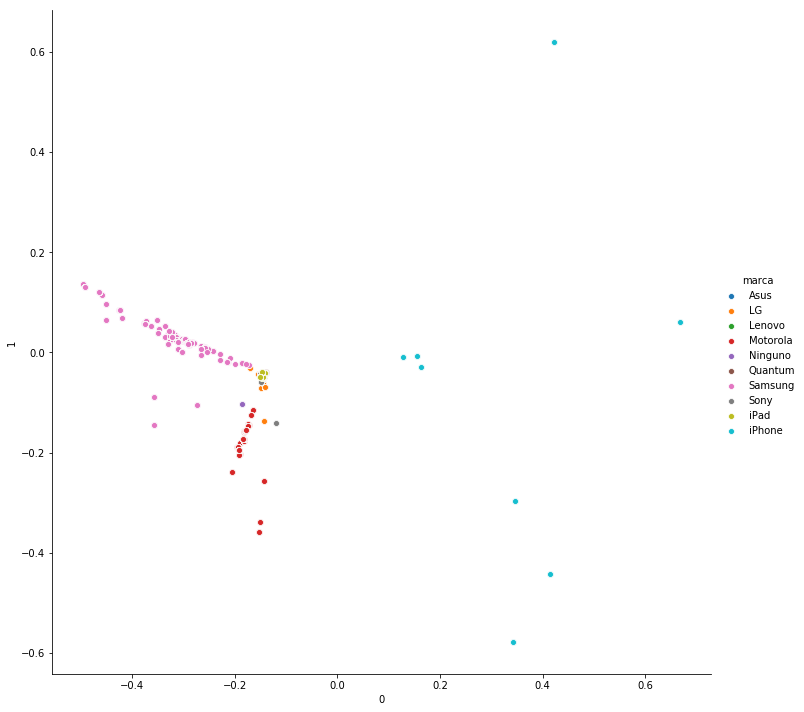

In [63]:
sns.pairplot(data=plot,x_vars=0,y_vars=1,hue='marca',height=10)

In [64]:
new_features = processed.join(df.drop('model',axis=1))

In [65]:
new_features.head()

,person,mayor_evento,prod_visto,dispos,compras,visitas,cant_prod_vistos,primer_visita,ultima_visita,cant_eventos,permanencia,hace_cuanto_visito,eventos_por_dia,channel,0,1
0,0008ed71,checkout,Ninguno,Computer,0,2,0,2018-05-17 12:27:47,2018-05-17 16:28:37,6,1,14,6.0,Referral,-0.186678,-0.103768
1,00091926,viewed product,iPhone 6S,Computer,0,34,372,2018-05-03 22:08:29,2018-05-31 19:52:03,448,28,0,16.0,Direct,0.414402,-0.442355
2,00091a7a,brand listing,iPhone 6S,Smartphone,0,1,3,2018-03-26 14:51:11,2018-03-26 14:56:58,10,1,66,10.0,Paid,0.414402,-0.442355
3,000ba417,viewed product,Samsung Galaxy A3 Duos,Computer,1,6,153,2018-05-17 11:11:45,2018-05-26 13:09:22,206,10,5,20.6,Direct,-0.303714,0.023156
4,000c79fe,searched products,iPhone 7,Smartphone,0,1,3,2018-05-29 00:27:47,2018-05-29 00:38:07,17,1,2,17.0,Paid,0.668334,0.060729


In [67]:
new_features.to_csv('new_processed.csv')